In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Modelo Físico do experimento g = 2 * H / t^2. Onde H é a altura do edifício Pelletron do Instituto de Física da USP, t é o tempo em segundos e g é a gravidade no local. H = 34m

3 Considere o experimento de queda das bolinhas do alto do edifício Oscar Sala (Pelletron) mostrado na 1ª aula (slides na página da disciplina no Moodle). Supondo que o valor verdadeiro do tempo de queda seja 𝑡0 = 2,525 𝑠, simule experimentos onde são medidos 𝑛 = 287 tempos sujeitos apenas a erros aleatórios gaussianos de desvio-padrão 𝜎𝑡 = 0,15 𝑠.

Simule 𝑴 = 𝟏𝟎. 𝟎𝟎𝟎 repetições do experimento (cada experimento como sendo composto por 𝒏 = 𝟐𝟖𝟕 medições do tempo, 𝒕) e registre os resultados finais, 𝒕𝒇, de cada experimento (𝒕𝒇 é a média dos 𝒏 valores de 𝒕 obtidos em cada repetição do experimento).

In [2]:
def simExpA(N, sA, t0):
    t = np.zeros((N,1))
    for i, val in enumerate(t, 0):
        t[i] = t0 + sA*np.random.randn()
    return np.mean(t)

a) Usando o valor médio de tempo de cada simulação, 𝑡𝑓, calcule a aceleração de queda considerando que a altura seja Δ𝐻 = 34,0 𝑚 e que a velocidade vertical inicial seja nula, 𝑎 = 2Δ𝐻/(𝑡𝑓)^2. Estime a incerteza dessas acelerações, 𝜎𝑎 (𝜎𝑎 é o desvio-padrão amostral dos valores de 𝑎).

In [3]:
N = 287
sA = 0.15
t0 = 2.525

M = 10000
T = np.zeros((M,1))

for j in range(M):
     T[j] = simExpA(N, sA, t0)
        
print('t_f = ({:.4f} ± {:.4f})s'.format(np.mean(T),np.std(T, ddof=1)))

t_f = (2.5251 ± 0.0088)s


b) Calcule o valor verdadeiro da aceleração de queda, 𝑎0, usando o valor verdadeiro dotempo de queda. Em quantas das 𝑀 repetições, o valor calculado de 𝑎 é maior que 𝑎0? Em quantas o módulo da diferença entre 𝑎 e 𝑎0 é menor que a incerteza de 𝑎? 

Vamos resolver isso por partes.

Primeramente, o valores de a0,

In [4]:
H = 34
for i in range(len(T)):
    T[i] = 2*H/(T[i]**2)
a_0 = np.mean(T)

print('A = ({:.3f} ± {:.3f})m'.format(a_0,np.std(T, ddof=1)))

A = (10.665 ± 0.075)m


Em quantas das 𝑀 repetições, o valor calculado de 𝑎 é maior que 𝑎0,

In [5]:
print('a > a_0: {}'.format(np.sum(T>a_0)))

a > a_0: 5031


Em quantas o módulo da diferença entre 𝑎 e 𝑎0 é menor que a incerteza de σa

In [6]:
print('|a - a_0| < σa: {}'.format(np.sum(abs(T-a_0) < np.std(T, ddof=1))))

|a - a_0| < σa: 6851


Um pouco de arte.

(array([  12.,   41.,  132.,  350.,  717., 1303., 1644., 1950., 1642.,
        1132.,  646.,  293.,  100.,   34.,    4.]),
 array([10.4018006 , 10.4374033 , 10.47300601, 10.50860871, 10.54421142,
        10.57981412, 10.61541682, 10.65101953, 10.68662223, 10.72222493,
        10.75782764, 10.79343034, 10.82903305, 10.86463575, 10.90023845,
        10.93584116]),
 <a list of 15 Patch objects>)

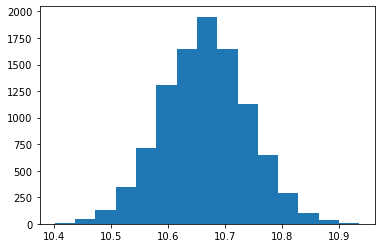

In [7]:
plt.hist(T, bins = 15)

Como podem ver a distribuição dos dados se aproxima de uma gaussiana. Importante comentar que inicialmente T[i] foi gerado por uma distribuição gaussina, depois definimos T[i] = 2*34/(T[i]^2)